In [ ]:
#
# Rework of Mr. Prashant Sharma's "Image recognition with TensorFlow and Keras"
#

In [ ]:
# https://github.com/ScrapCodes/image-recognition-tensorflow/blob/master/python/tf_solve_chihuahua_muffin.py

In [ ]:
# https://developer.ibm.com/articles/image-recognition-challenge-with-tensorflow-and-keras-pt1/
# https://developer.ibm.com/articles/image-recognition-challenge-with-tensorflow-and-keras-pt2/

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [8]:
import glob, os
import re

In [9]:
home_dir = os.getcwd()
print("home_dir: '<" + home_dir + ">")
resources_dir = home_dir+"/resources"
print("resources_dir: <" + resources_dir + ">")

#for file in glob.glob("*"):
#    print(file)

home_dir: '<\\192.168.101.22\d$\Nuova cartella\Neural networks and Deep learning\Image-recognition-tensorflow>
resources_dir: <\\192.168.101.22\d$\Nuova cartella\Neural networks and Deep learning\Image-recognition-tensorflow/resources>


In [10]:
# Pillow
import PIL
from PIL import Image

In [11]:
def jpeg_2_8bit_greyscale(path, max_size):
    img = Image.open(path).convert('L')
    WIDTH, HEIGHT = img.size
    if WIDTH != HEIGHT:
        m_min_d = min(WIDTH, HEIGHT)
        img = img.crop((0, 0, m_min_d, m_min_d))
    img.thumbnail(max_size, PIL.Image.ANTIALIAS)
    return np.asarray(img)

In [12]:
def load_image_dataset(path_dir, max_size):
    images = []
    labels = []
    os.chdir(path_dir)
    for file in glob.glob("*.*"):
        img = jpeg_2_8bit_greyscale(file, max_size)
        if re.match('chihuahua.*', file):
            images.append(img)
            labels.append(0)
        elif re.match('muffin.*', file):
            images.append(img)
            labels.append(1)
    return (np.asarray(images), np.asarray(labels))
            

In [13]:
max_size = 50, 50

In [14]:
os.chdir(home_dir)
(train_images, train_labels) = load_image_dataset('resources/data/chihuahua-muffin', max_size)
print(train_images.shape)
print(train_labels)

(12, 50, 50)
[0 0 0 0 0 0 1 1 1 1 1 1]


In [15]:
os.chdir(home_dir)
(test_images, test_labels) = load_image_dataset('resources/data/chihuahua-muffin/test', max_size)
print(test_images.shape)
print(test_labels)

(4, 50, 50)
[0 0 1 1]


In [16]:
class_names = ['chihuahua', 'muffin']

In [17]:
def display_images(images, labels):
    plt.figure(figsize = (10, 10))
    grid_size = min(25, len(images))
    for i in range(grid_size):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    

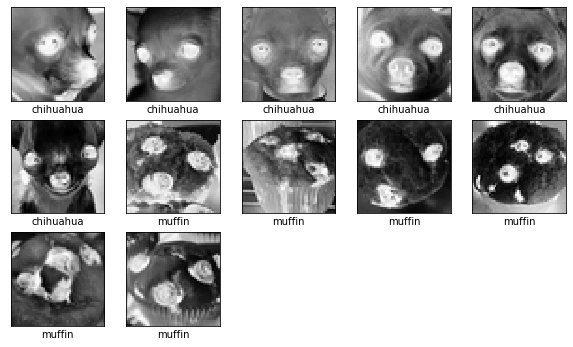

In [18]:
display_images(train_images, train_labels)
plt.show()

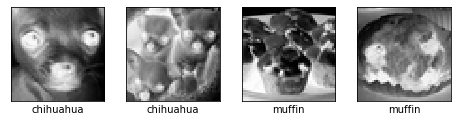

In [19]:
display_images(test_images, test_labels)
plt.show()

In [20]:
train_images = train_images/255.0
test_images = test_images/255.0

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = max_size),
    keras.layers.Dense(128, activation = tf.nn.sigmoid),
    keras.layers.Dense( 16, activation = tf.nn.sigmoid),
    keras.layers.Dense(  2, activation = tf.nn.softmax)    
])

In [22]:
sgd = keras.optimizers.SGD(lr = 0.01, decay = 1e-5, momentum = 0.7, nesterov=True)
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs = 100, verbose = 0)

In [24]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_accuracy)

4/1 [========================================================================================================================] - 0s 27ms/sample - loss: 0.6391 - accuracy: 0.5000
Test accuracy:  0.5


In [25]:
predictions = model.predict(test_images)
print(predictions)

[[0.5024179  0.49758208]
 [0.48999333 0.51000667]
 [0.3687338  0.6312662 ]
 [0.50085074 0.4991493 ]]


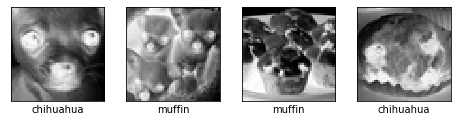

In [26]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()

In [27]:
# Models comparinson

In [28]:
def plot_history(histories, key = 'sparse_categorical_crossentropy'):
    plt.figure(figsize = (16, 10))
    for name, history in histories:
        val = plt.plot(
            history.epoch,
            history.history['val_' + key],
            '--',
            label = name.title() + ' Val'
        )
        plt.plot(history.epoch, history.history[key], color = val[0].get_color(), label = name.title() + "'Train")
        plt.xlabel("Epochs")
        plt.ylabel(key.replace("_", " ").title())
        plt.legend()
        plt.xlim([0, max(history.epoch)])
        plt.ylim([0, 2]
)

In [29]:
max_size_w, max_size_h = max_size

In [30]:
## Baseline model

In [31]:
baseline_model = keras.models.Sequential([
    #keras.layers.Flatten(input_shape = (max_size_w, max_size_h, 1)),
    keras.layers.Flatten(input_shape = max_size),
    keras.layers.Dense(128, activation = tf.nn.sigmoid),
    keras.layers.Dropout(0.25),
    keras.layers.Dense( 16, activation = tf.nn.sigmoid),
    keras.layers.Dense(  2, activation = tf.nn.softmax)
])

baseline_model.compile(
    optimizer = keras.optimizers.Adam(lr = 0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy', 'sparse_categorical_crossentropy']
)
baseline_model_history = baseline_model.fit(train_images, train_labels, epochs = 400, validation_data = (test_images, test_labels), verbose = 0)

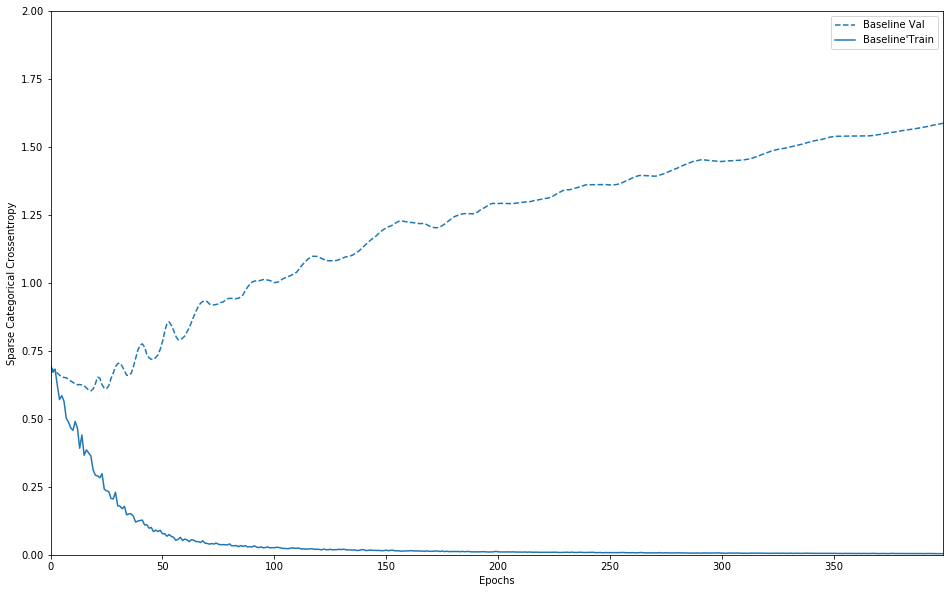

In [32]:
plot_history([('baseline', baseline_model_history)])

In [33]:
## Bigger models

In [34]:
bigger_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = max_size),
    keras.layers.Dense(256, activation = tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense( 64, activation = tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense( 16, activation = tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
bigger_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy', 'sparse_categorical_crossentropy']
)

bigger_model_history = bigger_model.fit(train_images, train_labels, epochs = 400, validation_data = (test_images, test_labels), verbose = 0)

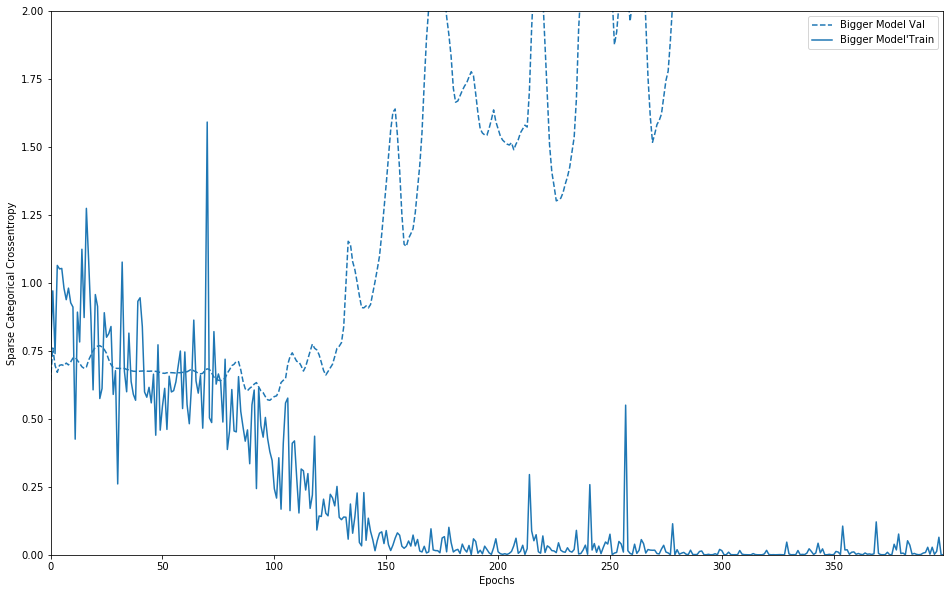

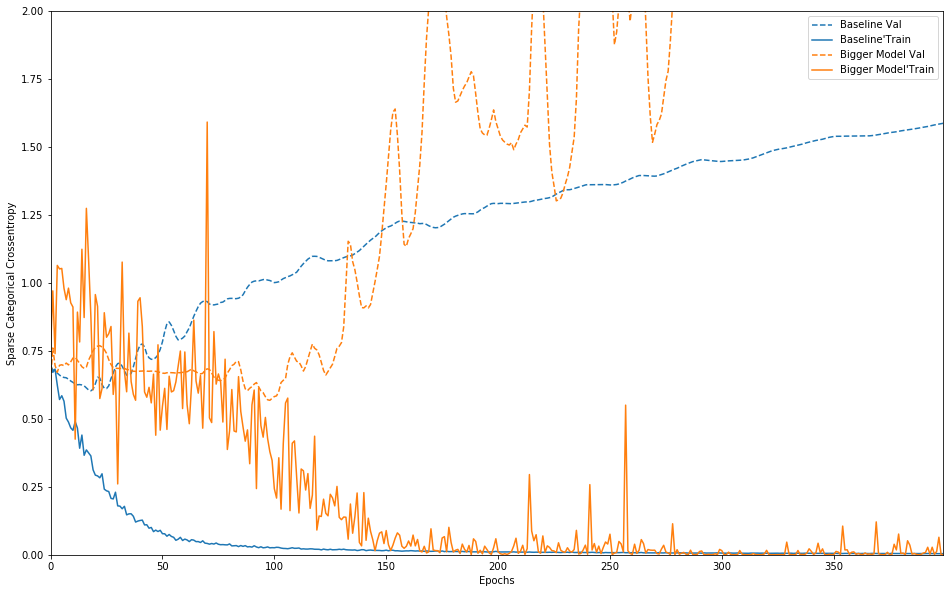

In [35]:
plot_history([('bigger model', bigger_model_history)])
plot_history([('baseline', baseline_model_history), ('bigger model', bigger_model_history)])

In [36]:
bigger_model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = max_size),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense( 64, activation = tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense( 16, activation = tf.nn.relu),
    keras.layers.Dense(  2, activation = tf.nn.softmax)
])

bigger_model_1.compile(
    optimizer = keras.optimizers.Adam(lr = 0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy', 'sparse_categorical_crossentropy']
)

bigger_model_1_history = bigger_model_1.fit(train_images, train_labels, epochs=400, validation_data = (test_images, test_labels), verbose = 0)

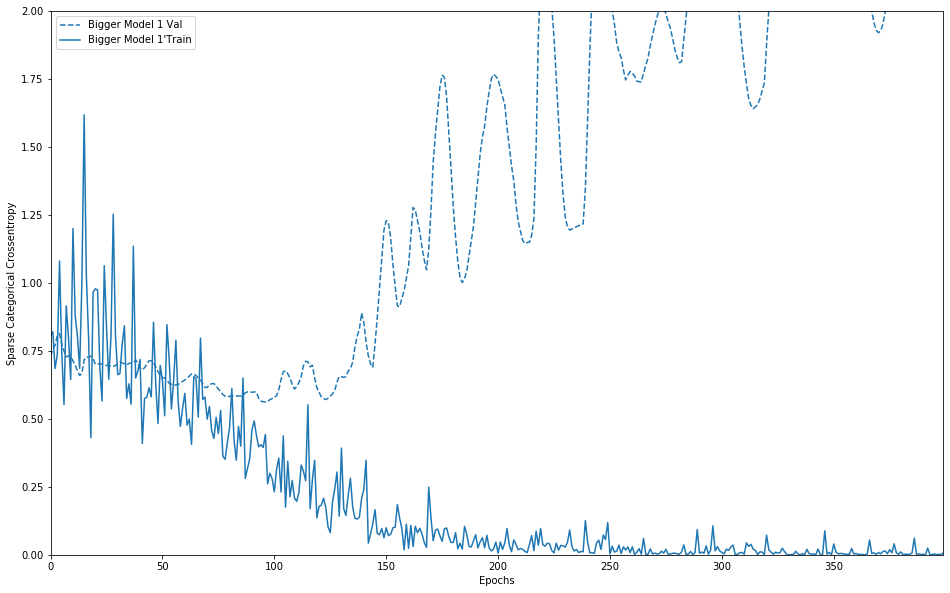

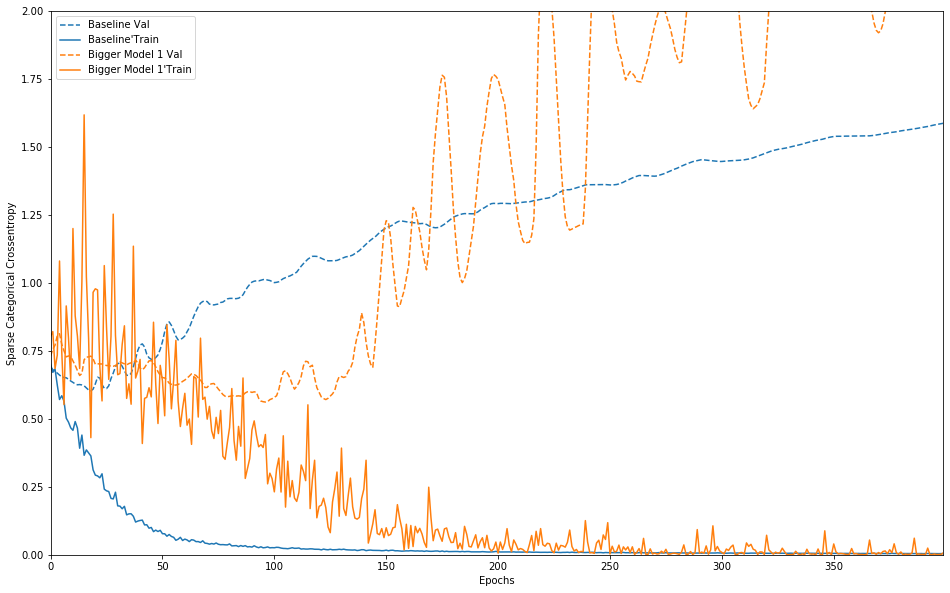

In [37]:
plot_history([('bigger model 1', bigger_model_1_history)])
plot_history([('baseline', baseline_model_history), ('bigger model 1', bigger_model_1_history)])

In [38]:
## Smaller models

In [ ]:
smaller_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = max_size),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation = tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense( 16, activation = tf.nn.relu),
    keras.layers.Dense(  2, activation = tf.nn.softmax)
])

smaller_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy', 'sparse_categorical_crossentropy']
)

smaller_model_history = smaller_model.fit(train_images, train_labels, epochs = 400, validation_data = (test_images, test_labels), verbose = 0)

In [ ]:
plot_history([('smaller model', smaller_model_history)])
plot_history([('baseline', baseline_model_history), ('smaller model', smaller_model_history)])

In [ ]:
smaller_model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = max_size),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense( 2, activation = tf.nn.softmax)
])

smaller_model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy','sparse_categorical_crossentropy']
)

smaller_model_1_history = smaller_model_1.fit(train_images, train_labels, epochs = 400, validation_data = (test_images, test_labels), verbose = 0)

In [ ]:
plot_history([('smaller model 1', smaller_model_1_history)])
plot_history([('baseline', baseline_model_history), ('smaller model 1', smaller_model_1_history)])

In [ ]:
# Overall comparison

In [ ]:
plot_history([
    ('baseline', baseline_model_history),
    ('smaller model', smaller_model_history),
    ('smaller model 1', smaller_model_1_history),
    ('bigger model', bigger_model_history),
    ('bigger model 1', bigger_model_1_history),
])